In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot as plt
import process
import low_structures
import visualize
import numpy as np

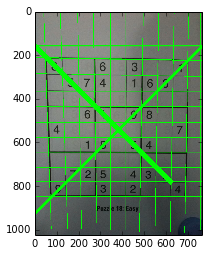

In [6]:
img_org = process.get_example_image('s6.png')
img = process.pre_process(img_org)
lines = process.find_lines(img, 100)
dedup = low_structures.remove_duplicate_lines(lines, 15, img.shape)

points = low_structures.intersections(dedup)
img_w_lines = visualize.draw_lines(img_org, dedup)
img_w_points = visualize.draw_points(img_w_lines, points.values())
_ = plt.imshow(img_w_lines)

In [7]:
buckets = low_structures.generate_angle_buckets(15, step=7.5, ortogonal=True)
bucketed_lines = low_structures.put_lines_into_buckets(buckets, dedup)

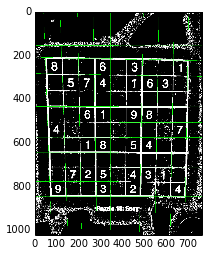

In [21]:
empty = img_org.copy()
empty.fill(0)
angle, line_class = bucketed_lines[0]
tmp = visualize.draw_lines(img, line_class, thickness=1)
_ = plt.imshow(tmp)

In [32]:
print angle
binded = low_structures.bind_intersections_to_lines(line_class)
low_structures.average_fragment_len(binded)

0


61.361967074819816